# Lab 7
### Segmentation 2

In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

119
102
92
90
88
88


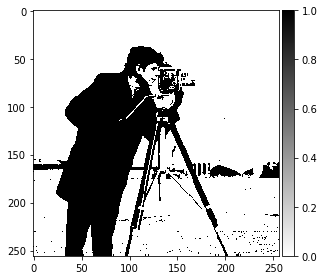

72
69
68
68


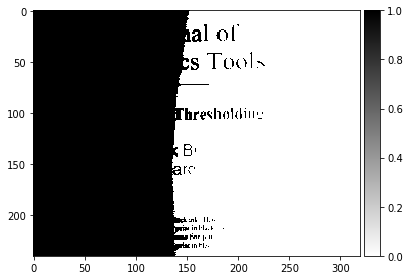

In [61]:
def ConvertToBinary(mPic,Threshold):
    for i in range(np.shape(mPic)[0]):
        for j in range (np.shape(mPic)[1]):
            if mPic[i][j] >= Threshold:
                mPic[i][j]=0
            else:
                mPic[i][j]=1
    return mPic
def PrintBinary(PIC):
    io.imshow(PIC,cmap="binary") # 0~255 np.zeros((2, 1))
    io.show()

def getThreshold(rImage):
    rImage=(rImage).astype(np.uint8)
    rImage=rgb2gray(rImage)
    NumberOfPixels=[]
    for Index in range (256): # Number of GrayLevels
        count =0
        for i in range(np.shape(rImage)[0]):
            for j in range(np.shape(rImage)[1]):
                if rImage[i][j] == Index :
                    count=count+1
        NumberOfPixels.append(count)
        
    k=255 # any k ? Numbers of GrayLevel
    rsum=0
    for i in range(255):
        rsum+=i*NumberOfPixels[i]
    
    T_Inital=round((rsum/(sum(NumberOfPixels)+1)))
    print(T_Inital)
    for i in range(5):
            rsum=0
            bsum=0
            for X in range(T_Inital):
                rsum+=X*NumberOfPixels[X]
            for Y in range(255-T_Inital):
                bsum+=(Y+T_Inital)*NumberOfPixels[Y+T_Inital]
        
            First_PeakMean=round((rsum)/((sum(NumberOfPixels[:T_Inital]))))
            Sec_PeakMean=round((bsum)/(sum(NumberOfPixels[T_Inital:])))
            old=T_Inital
            T_Inital=round((First_PeakMean+Sec_PeakMean)/2)
            print(T_Inital)
            if old == T_Inital:
                break
    return T_Inital
                   
                   
r = io.imread('cameraman.png')
CurrThresh=getThreshold(r)
r=ConvertToBinary(r,CurrThresh)
PrintBinary(r)




r = io.imread('book.png')
CurrThresh=getThreshold(r)
r=ConvertToBinary(r,CurrThresh)
PrintBinary(r) 







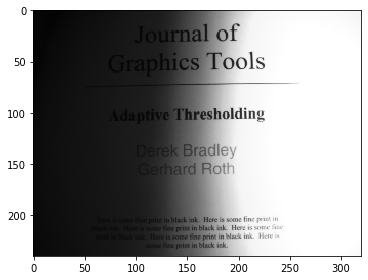

72
69
68
68


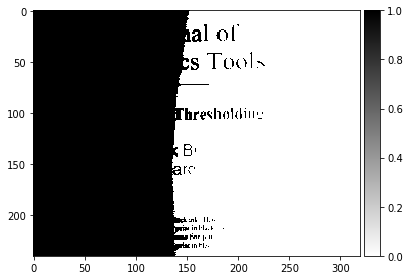

27
34
40
44
45
46
121
104
94
90
88
88
32
41
46
48
50
50
109
98
94
92
92


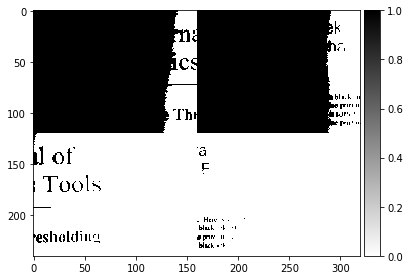

In [62]:

r = io.imread('book.png')

M=np.shape(r)[0]
N=np.shape(r)[1]

LeftTop=np.copy(r[:int(M/2),:int(N/2)])
LeftBot=np.copy(r[:int(M/2),int(N/2):])
RightTop=np.copy(r[int(M/2):,:int(N/2)])
RightBot=np.copy(r[int(M/2):,int(N/2):])



io.imshow(r) # 0~255 np.zeros((2, 1))
io.show()



CurrThresh=getThreshold(r)
r=ConvertToBinary(r,CurrThresh)
PrintBinary(r) 









CurrThresh=getThreshold(LeftTop)
LeftTop=ConvertToBinary(LeftTop,CurrThresh)


CurrThresh=getThreshold(LeftBot)
LeftBot=ConvertToBinary(LeftBot,CurrThresh)


CurrThresh=getThreshold(RightTop)
RightTop=ConvertToBinary(RightTop,CurrThresh)


CurrThresh=getThreshold(RightBot)
RightBot=ConvertToBinary(RightBot,CurrThresh)

UpperA = np.hstack((LeftTop, RightTop))
DownA = np.hstack((LeftBot, RightBot))
Merge=np.vstack((UpperA, DownA))
PrintBinary(Merge) 







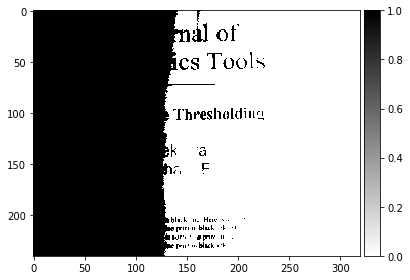

In [63]:
UpperA = np.hstack((LeftTop, LeftBot))
DownA = np.hstack((RightTop, RightBot))
Merge=np.vstack((UpperA, DownA))
PrintBinary(Merge) 
